# Statistics Exercises Solution

## 1. BASIC PROBABILITY

In [1]:
# Question 1
import numpy as np

def compute_mean(X):
    s = 0
    for x in X:
        s += x
    miu = s / len(X)
    return miu

X = [2, 0, 2, 2, 7, 4, -2, 5, -1, -1]

assert compute_mean(X) == np.mean(X)
print("Mean: ", compute_mean(X))

Mean:  1.8


In [2]:
# Question 2
import numpy as np

def compute_median(X):
    size = len(X)
    X = np.sort(X)
    # print(X)
    if (size % 2 == 0):
        result = (X[int(size / 2) - 1] + X[int(size / 2)]) / 2
        return result
    else:
        return X[int(size / 2)]

X = [1, 5, 4, 4, 9, 13]
assert compute_median(X) == np.median(X)
print("Median: ", compute_median(X))

Median:  4.5


In [3]:
# Question 3

def compute_std(X):
    mean = compute_mean(X)

    variance = 0
    for x in X:
        variance += (x - mean) ** 2
    variance /= len(X)

    return np.sqrt(variance)

X = [ 171, 176, 155, 167, 169, 182]
assert compute_std(X)==np.std(X)
print(np.round(compute_std(X),2))

8.33


In [4]:
# Question 4

def compute_correlation_cofficient(X, Y):
    N = len(X)
    numerator = 0
    denominator = 0

    numerator = N * np.dot(X, Y) - np.sum(X)* np.sum(Y)
    denominator = np.sqrt(N * np.sum(X*X.T) - (np.sum(X))**2) \
                * np.sqrt(N * np.sum(Y*Y.T) - (np.sum(Y))**2)

    return np.round(numerator / denominator ,2)

X = np.asarray([-2, -5, -11, 6, 4, 15, 9])
Y = np.asarray ([4, 25, 121, 36, 16, 225, 81])
assert compute_correlation_cofficient(X, Y) == np.round(np.corrcoef(X,Y)[0][-1], 2)
print("Correlation: ", compute_correlation_cofficient(X,Y))

Correlation:  0.42


## 2. TABULAR DATA ANALYSIS


In [5]:
# Question 5
import pandas as pd
data = pd.read_csv("advertising.csv")

def correlation(x, y):
    return np.corrcoef(x, y)[0][-1]

# display(data.head())

x = data["TV"]
y = data["Radio"]

corr_xy = correlation(x, y)
print(f"Correlation between TV and Sales: {np.round(corr_xy, 2)}")

Correlation between TV and Sales: 0.05


In [6]:
# Question 6

data = pd.read_csv("advertising.csv")

def correlation(x, y):
    return np.corrcoef(x, y)[0][-1]

features = ["TV", "Radio", "Newspaper"]
for feature_1 in features:
    for feature_2 in features:
        correlation_value = correlation(data[feature_1], data[feature_2])
        print(f"Correlation between {feature_1} and {feature_2}: {np.round(correlation_value , 2)}")

Correlation between TV and TV: 1.0
Correlation between TV and Radio: 0.05
Correlation between TV and Newspaper: 0.06
Correlation between Radio and TV: 0.05
Correlation between Radio and Radio: 1.0
Correlation between Radio and Newspaper: 0.35
Correlation between Newspaper and TV: 0.06
Correlation between Newspaper and Radio: 0.35
Correlation between Newspaper and Newspaper: 1.0


In [7]:
# Question 7

data = pd.read_csv("advertising.csv")
x = data["Radio"]
y = data["Newspaper"]
result = np.corrcoef(x, y)
print(result)


[[1.         0.35410375]
 [0.35410375 1.        ]]


In [8]:
# Question 8
data_corr_coef = data.corr()
data_corr_coef

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [9]:
np.median([24, 25, 25, 29, 32])

np.float64(25.0)

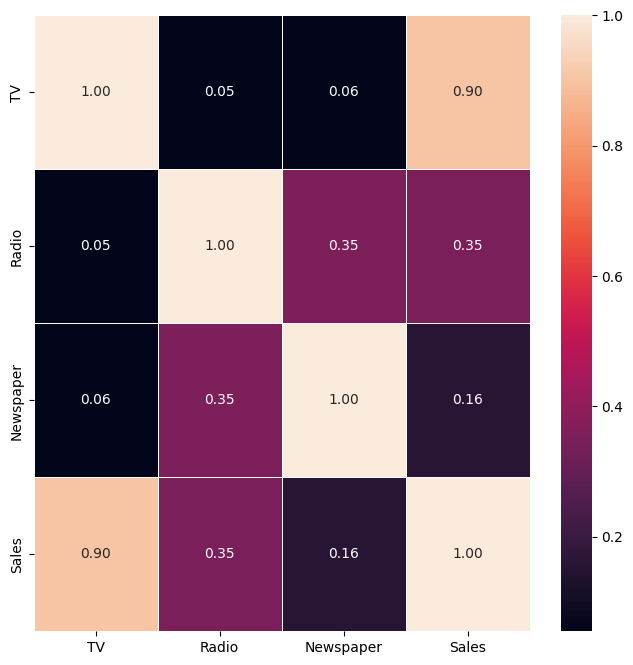

In [10]:
# Question 9
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,8))
sns.heatmap(data_corr_coef, annot=True, fmt=".2f", linewidth=.5)
plt.show()

## 3. TEXT RETRIEVAL

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Question 10

vi_data_df = pd.read_csv("./vi_text_retrieval.csv")
context = vi_data_df["text"]
context = [doc.lower() for doc in context]

tfidf_vectorizer = TfidfVectorizer()
context_embedded = tfidf_vectorizer.fit_transform(context)
# print(context_embedded.shape)

context_embedded.toarray()[7][0]

np.float64(0.31126580760710637)

In [13]:
# tfidf_vectorizer.vocabulary_

In [14]:
# Question 11
def tfidf_search(question, tfidf_vectorizer, top_d=5):
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    cosine_scores = cosine_similarity(context_embedded, query_embedded).reshape((-1,))
    results = []
    for idx in cosine_scores.argsort()[-top_d:][::-1]:
        doc = {
            'id': idx,
            'cosine_score':cosine_scores[idx]
        }
        results.append(doc)
    return results


question = vi_data_df.iloc[0]['question']
print("Question: ", question)
results = tfidf_search(question, tfidf_vectorizer)
print(results[0]["cosine_score"])
print("="* 68, "\n")

for result in results:
    print("Id: ", result['id'])
    print("Score: ", result['cosine_score'])
    print(vi_data_df.iloc[result['id'], 2])
    print("=======")

Question:  Quang Hải giành được chức vô địch U21 quốc gia năm bao nhiêu tuổi
0.6279910475266972

Id:  0
Score:  0.6279910475266972
Năm 2013 , Nguyễn Quang Hải giành chức vô địch U21 quốc gia 2013 cùng với đội trẻ Hà Nội T&T và tạo nên cú sốc khi trở thành cầu thủ 16 tuổi đầu tiên giành được danh hiệu vô địch U21 quốc gia .
Id:  97
Score:  0.21145795862251632
Bao Công huý là Bao Chửng ( chữ Hán : 包拯 ; 11 tháng 4 năm 999 - 20 tháng 5 năm 1062 ) , tự Hy Nhân . Ngoài ra , ông còn được gọi là Bao Thanh thiên , Bao Đãi chế , Bao Hắc tử , Bao Học sĩ hay Bao Long Đồ .
Id:  136
Score:  0.17714753149794468
Arsenal đã giành được 13 chức vô địch quốc gia , 13 Cúp FA ( kỷ lục ) , 2 Cúp Liên đoàn Anh , 1 Cúp Liên đoàn Thế kỷ , 15 Siêu cúp Anh , 1 Cúp UEFA và 1 Cúp Inter-Cities Fairs . Arsenal là câu lạc bộ có số trận thắng ở cấp cao nhất nhiều thứ hai trong lịch sử bóng đá Anh , và cũng là đội bóng Anh duy nhất cho đến nay vô địch quốc gia với thành tích bất bại qua 38 vòng đấu , nhận biệt danh The 

In [15]:
# Question 12

def corr_search(question, tfidf_vectorizer, top_d=5):
    query_embedded = tfidf_vectorizer.transform([question.lower()])
    corr_scores = np.corrcoef(
        query_embedded.toarray()[0],
        context_embedded.toarray()
    )
    corr_scores = corr_scores[0][1:]
    results = []
    for idx in corr_scores.argsort()[-top_d:][::-1]:
        doc = {
            'id': idx,
            'corr_score':corr_scores[idx]
        }
        results.append(doc)
    return results

question = vi_data_df.iloc[0]['question']
print("Question: ", question)
results = corr_search(question, tfidf_vectorizer)
print(results[1]["corr_score"])
print("="*68, "\n")

for result in results:
    print("Id: ", result['id'])
    print("Score: ", result['corr_score'])
    print(vi_data_df.iloc[result['id'], 2])
    print("=======")

Question:  Quang Hải giành được chức vô địch U21 quốc gia năm bao nhiêu tuổi
0.20734246471976162

Id:  0
Score:  0.6259599752568777
Năm 2013 , Nguyễn Quang Hải giành chức vô địch U21 quốc gia 2013 cùng với đội trẻ Hà Nội T&T và tạo nên cú sốc khi trở thành cầu thủ 16 tuổi đầu tiên giành được danh hiệu vô địch U21 quốc gia .
Id:  97
Score:  0.20734246471976162
Bao Công huý là Bao Chửng ( chữ Hán : 包拯 ; 11 tháng 4 năm 999 - 20 tháng 5 năm 1062 ) , tự Hy Nhân . Ngoài ra , ông còn được gọi là Bao Thanh thiên , Bao Đãi chế , Bao Hắc tử , Bao Học sĩ hay Bao Long Đồ .
Id:  136
Score:  0.17124615520165778
Arsenal đã giành được 13 chức vô địch quốc gia , 13 Cúp FA ( kỷ lục ) , 2 Cúp Liên đoàn Anh , 1 Cúp Liên đoàn Thế kỷ , 15 Siêu cúp Anh , 1 Cúp UEFA và 1 Cúp Inter-Cities Fairs . Arsenal là câu lạc bộ có số trận thắng ở cấp cao nhất nhiều thứ hai trong lịch sử bóng đá Anh , và cũng là đội bóng Anh duy nhất cho đến nay vô địch quốc gia với thành tích bất bại qua 38 vòng đấu , nhận biệt danh The